In [1]:
import pandas as pd
import gzip
import json


import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = "reviews_Cell_Phones_and_Accessories_5.json.gz"

In [3]:
phone_df = pd.read_json(file_path, lines = True)
phone_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [4]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [5]:
# drop duplicates
phone_df_drop = phone_df.dropna().reset_index(drop = True)

In [6]:
phone_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190920 entries, 0 to 190919
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      190920 non-null  object
 1   asin            190920 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         190920 non-null  object
 4   reviewText      190920 non-null  object
 5   overall         190920 non-null  int64 
 6   summary         190920 non-null  object
 7   unixReviewTime  190920 non-null  int64 
 8   reviewTime      190920 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.1+ MB


In [7]:
# check for duplicates
# phone_df_drop.duplicated()
phone_df_drop.astype(str).duplicated(keep=False).sum()

0

In [8]:
# Get a count of ratings
ratings_count = phone_df_drop['overall'].value_counts()
ratings_count

5    106573
4     39305
3     21075
1     13078
2     10889
Name: overall, dtype: int64

In [9]:
# Check percentage of each rating
ratings_count_props = phone_df_drop['overall'].value_counts(normalize = True)
ratings_count_props

5    0.558208
4    0.205872
3    0.110387
1    0.068500
2    0.057034
Name: overall, dtype: float64

In [10]:
# Plot the categories


C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


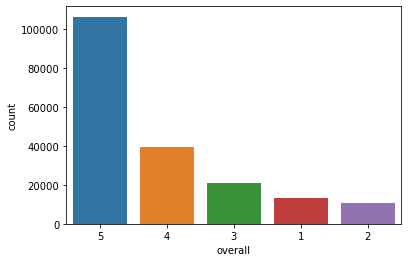

In [11]:
sns.countplot(phone_df_drop['overall'], order=phone_df_drop['overall'].value_counts(ascending=False).index)
plt.show()

In [12]:
# Inspect top customers by review
reviewer_count = phone_df_drop['reviewerName'].value_counts(ascending=False)
reviewer_count.head()

Amazon Customer    3562
Pen Name            344
John                268
Chris               234
Mike                224
Name: reviewerName, dtype: int64

In [13]:
# Extract columns of interest into a new dataframe
data_df = phone_df_drop[['overall', 'reviewText']]
data_df.head()

,overall,reviewText
0,4,They look good and stick good! I just don't li...
1,5,These stickers work like the review says they ...
2,5,These are awesome and make my phone look so st...
3,4,Item arrived in great time and was in perfect ...
4,5,"awesome! stays on, and looks great. can be use..."


In [14]:
# Select a sample of data to run Machine Learning. This done for performance issues


In [15]:
div_data = np.random.rand(len(data_df)) < 0.8
ml_data = data_df[~div_data]
print(len(ml_data))

38049


In [16]:
# Size of the data is scalable for running machine learning models on disk
ml_data_df = ml_data.reset_index(drop = True)
ml_data_df.head()

,overall,reviewText
0,5,"awesome! stays on, and looks great. can be use..."
1,5,Performs exactly as advertised . It's very st...
2,5,It works great. Doesn't heat up like crazy lik...
3,2,I am disappointed that the 1A didn't work with...
4,1,Only works one side at a time. When you connec...


C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


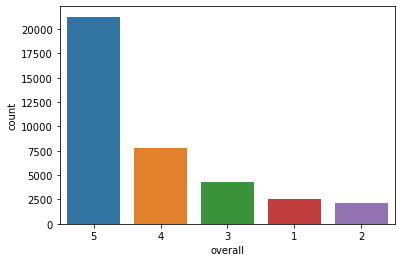

In [17]:
# Inspect distribution of ratings
sns.countplot(ml_data_df['overall'], order=ml_data_df['overall'].value_counts(ascending=False).index)
plt.show()

In [18]:
ratings_new_count_props = ml_data_df['overall'].value_counts(normalize = True)
ratings_new_count_props

5    0.558963
4    0.205446
3    0.112434
1    0.066993
2    0.056164
Name: overall, dtype: float64

In [19]:
# rename columns to class and text
df_renamed = ml_data_df.rename(columns = {'overall': 'class', 'reviewText': 'text'})
df_renamed.tail()

,class,text
38044,5,I've gotten in a habit of rubbing it back and ...
38045,5,I get so many compliments on this case. It was...
38046,5,"Ahah, I love it. The case looks better than th..."
38047,5,What a high quality cable. Right out of the pa...
38048,5,"I don't like the word ""hate"", so let's just sa..."


## Text Preprocessing

In [40]:
import nltk

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier

import pickle


In [25]:
# remove punctuation
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
df_renamed['cleaned_text'] = df_renamed['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x)\
                                                                  .split() if i not in words]).lower())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenpk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [26]:
df_renamed.head()

,class,text,cleaned_text
0,5,"awesome! stays on, and looks great. can be use...",awesom stay look great use multipl appl produc...
1,5,Performs exactly as advertised . It's very st...,perform exactli advertis it sturdili built pro...
2,5,It works great. Doesn't heat up like crazy lik...,it work great doesn heat like crazi like one i...
3,2,I am disappointed that the 1A didn't work with...,i disappoint a work ipad that i get buy cheap ...
4,1,Only works one side at a time. When you connec...,onli work one side time when connect two cabl ...


In [48]:
# Split data
X = df_renamed['cleaned_text']
y = df_renamed['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [37]:
# Vectorize all features to input in model cross validation using max_features = 100
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", max_features = 100, sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df_renamed['cleaned_text']).toarray()
labels = df_renamed['class']
final_features.shape, labels.shape

((38049, 100), (38049,))

In [38]:
# Create pipeline to vectorize train data with selectkbest for max_features
# Vectorize corpus
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))



                     

In [42]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [60]:
# use cross validation to select best model
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(max_iter = 200, random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, final_features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [61]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.571605
LogisticRegression        0.573208
MultinomialNB             0.559647
RandomForestClassifier    0.560908
Name: accuracy, dtype: float64

In [2]:
# use SelectKbest to extract best features
# Random Forest pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                    ('rf', RandomForestClassifier())])

NameError: name 'Pipeline' is not defined

In [1]:
model = pipeline.fit_transform(X_train, y_train)

NameError: name 'pipeline' is not defined

In [56]:
ytest = np.array(y_test)

In [57]:
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))


              precision    recall  f1-score   support

           1       0.58      0.27      0.37       632
           2       0.18      0.02      0.03       531
           3       0.30      0.11      0.16      1034
           4       0.39      0.20      0.26      2032
           5       0.63      0.93      0.76      5284

    accuracy                           0.59      9513
   macro avg       0.42      0.31      0.32      9513
weighted avg       0.52      0.59      0.52      9513



In [58]:
print(confusion_matrix(ytest, model.predict(X_test)))

[[ 171   17   61   58  325]
 [  47   10   55   77  342]
 [  34   14  109  241  636]
 [  15    7   76  403 1531]
 [  27    9   64  256 4928]]
